# 欠損値

In [1]:
# 欠損データを作成
import pandas as pd
from io import StringIO

csv_data = '''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''

df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [2]:
# 各特徴の欠損値の数をカウント
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

# 欠損値の削除
※欠損値の削除はデータが減少するためあまり使わない

In [3]:
# 欠損値を含む行を削除(元データは更新されていない)

df.dropna()

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [6]:
# 欠損値を含む列を削除

df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


# 欠損値の補完

In [7]:
# 平均値の補完

from sklearn.preprocessing import Imputer

imr = Imputer(missing_values='NaN', strategy='mean', axis=0) # 平均値補完のインスタンス作成
imr = imr.fit(df) # データを適合
imputed_data = imr.transform(df.values) # 補完を実行
imputed_data

array([[  1. ,   2. ,   3. ,   4. ],
       [  5. ,   6. ,   7.5,   8. ],
       [ 10. ,  11. ,  12. ,   6. ]])

# カテゴリデータの処理
color・・・名義特徴量<br>
size・・・順序特徴量<br>

In [8]:
import pandas as pd

df = pd.DataFrame([['green', 'M', 10.1, 'class1'],
                   ['red', 'L', 13.5, 'class2'],
                   ['blue', 'XL', 15.3, 'class1']])

df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [9]:
# sizeをエンコーディング

size_mapping = {'XL': 3,
                'L': 2,
                'M': 1}

df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [10]:
# classのエンコーディング
import numpy as np

class_mapping = {label: idx for idx, label in enumerate(np.unique(df['classlabel']))}
class_mapping

{'class1': 0, 'class2': 1}

In [11]:
df['classlabel'] = df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


In [13]:
# 一旦戻す
inv_class_mapping = {v: k for k, v in class_mapping.items()}
df['classlabel'] = df['classlabel'].map(inv_class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [14]:
# sklのクラスを使う方法もある
from sklearn.preprocessing import LabelEncoder

class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)
y

array([0, 1, 0], dtype=int32)

In [16]:
class_le.inverse_transform(y)

array(['class1', 'class2', 'class1'], dtype=object)

In [17]:
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


# one-hotエンコーディング
colorを単純に数値に変えると順序がついてしまう。その対応

In [19]:
X = df[['color', 'size', 'price']].values

color_le = LabelEncoder()
X[:, 0] = color_le.fit_transform(X[:, 0])
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

In [20]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(categorical_features=[0])
ohe.fit_transform(X).toarray()

array([[  0. ,   1. ,   0. ,   1. ,  10.1],
       [  0. ,   0. ,   1. ,   2. ,  13.5],
       [  1. ,   0. ,   0. ,   3. ,  15.3]])

In [21]:
pd.get_dummies(df[['price', 'color', 'size']])

,price,size,color_blue,color_green,color_red
0,10.1,1,0,1,0
1,13.5,2,0,0,1
2,15.3,3,1,0,0


# トレーニング用とテスト用に分割

In [3]:
# サンプルデータをダウンロード

import pandas as pd
import numpy as np
df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                      'ml/machine-learning-databases/wine/wine.data',
                      header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

print('Class labels', np.unique(df_wine['Class label']))
df_wine.head()

Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
# 分割

from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values # 特徴変数と目的変数に分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) # train,testに分割

In [5]:
X_train

array([[  1.37100000e+01,   1.86000000e+00,   2.36000000e+00, ...,
          1.11000000e+00,   4.00000000e+00,   1.03500000e+03],
       [  1.22200000e+01,   1.29000000e+00,   1.94000000e+00, ...,
          8.60000000e-01,   3.02000000e+00,   3.12000000e+02],
       [  1.32700000e+01,   4.28000000e+00,   2.26000000e+00, ...,
          5.90000000e-01,   1.56000000e+00,   8.35000000e+02],
       ..., 
       [  1.24200000e+01,   1.61000000e+00,   2.19000000e+00, ...,
          1.06000000e+00,   2.96000000e+00,   3.45000000e+02],
       [  1.39000000e+01,   1.68000000e+00,   2.12000000e+00, ...,
          9.10000000e-01,   3.33000000e+00,   9.85000000e+02],
       [  1.41600000e+01,   2.51000000e+00,   2.48000000e+00, ...,
          6.20000000e-01,   1.71000000e+00,   6.60000000e+02]])

In [6]:
X_test

array([[  1.37400000e+01,   1.67000000e+00,   2.25000000e+00,
          1.64000000e+01,   1.18000000e+02,   2.60000000e+00,
          2.90000000e+00,   2.10000000e-01,   1.62000000e+00,
          5.85000000e+00,   9.20000000e-01,   3.20000000e+00,
          1.06000000e+03],
       [  1.27900000e+01,   2.67000000e+00,   2.48000000e+00,
          2.20000000e+01,   1.12000000e+02,   1.48000000e+00,
          1.36000000e+00,   2.40000000e-01,   1.26000000e+00,
          1.08000000e+01,   4.80000000e-01,   1.47000000e+00,
          4.80000000e+02],
       [  1.23700000e+01,   1.13000000e+00,   2.16000000e+00,
          1.90000000e+01,   8.70000000e+01,   3.50000000e+00,
          3.10000000e+00,   1.90000000e-01,   1.87000000e+00,
          4.45000000e+00,   1.22000000e+00,   2.87000000e+00,
          4.20000000e+02],
       [  1.35600000e+01,   1.73000000e+00,   2.46000000e+00,
          2.05000000e+01,   1.16000000e+02,   2.96000000e+00,
          2.78000000e+00,   2.00000000e-01,   2.450

# 特徴量の尺度を揃える

In [7]:
# 正規化

from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [8]:
X_train_norm

array([[ 0.72043011,  0.20378151,  0.53763441, ...,  0.48717949,
         1.        ,  0.5854251 ],
       [ 0.31989247,  0.08403361,  0.31182796, ...,  0.27350427,
         0.64102564,  0.        ],
       [ 0.60215054,  0.71218487,  0.48387097, ...,  0.04273504,
         0.10622711,  0.42348178],
       ..., 
       [ 0.37365591,  0.1512605 ,  0.44623656, ...,  0.44444444,
         0.61904762,  0.02672065],
       [ 0.77150538,  0.16596639,  0.40860215, ...,  0.31623932,
         0.75457875,  0.54493927],
       [ 0.84139785,  0.34033613,  0.60215054, ...,  0.06837607,
         0.16117216,  0.28178138]])

In [9]:
# 標準化

from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [10]:
X_train_std

array([[ 0.91083058, -0.46259897, -0.01142613, ...,  0.65706596,
         1.94354495,  0.93700997],
       [-0.95609928, -0.96608672, -1.53725357, ..., -0.40859506,
         0.58118003, -1.41336684],
       [ 0.35952243,  1.67501572, -0.37471838, ..., -1.55950896,
        -1.44846566,  0.28683658],
       ..., 
       [-0.70550467, -0.68342693, -0.62902295, ...,  0.44393375,
         0.49776993, -1.30608823],
       [ 1.14889546, -0.6215951 , -0.88332752, ..., -0.19546286,
         1.0121322 ,  0.77446662],
       [ 1.47466845,  0.11155374,  0.42452457, ..., -1.43162964,
        -1.23994042, -0.28206514]])

In [11]:
# 正規化と標準化の例

ex = pd.DataFrame([0, 1, 2, 3, 4, 5])

# standardize
ex[1] = (ex[0] - ex[0].mean()) / ex[0].std(ddof=0)

# normalize
ex[2] = (ex[0] - ex[0].min()) / (ex[0].max() - ex[0].min())
ex.columns = ['input', 'standardized', 'normalized']
ex

,input,standardized,normalized
0,0,-1.46385,0.0
1,1,-0.87831,0.2
2,2,-0.29277,0.4
3,3,0.29277,0.6
4,4,0.87831,0.8
5,5,1.46385,1.0


# 特徴量の選択

### L1正則化・・・重みを小さくし、トレーニングデータへの依存を減らす

In [13]:
# ロジスティック回帰のL1正則化　→　トレーニングデータもテストデータも同じくらいの確率

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l1', C=0.1)
lr.fit(X_train_std, y_train)
print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))

Training accuracy: 0.983870967742
Test accuracy: 0.981481481481


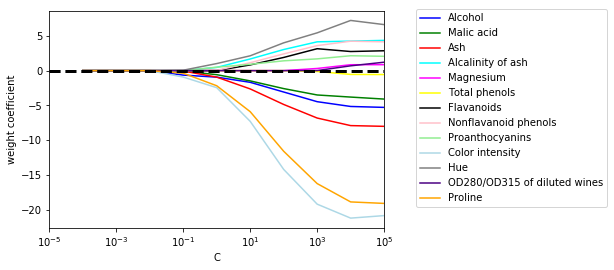

In [14]:
# 正則化を強めると（C<0）重みが０になることがわかる

import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)
    
colors = ['blue', 'green', 'red', 'cyan', 
          'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 
          'gray', 'indigo', 'orange']

weights, params = [], []
for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l1', C=10.**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=df_wine.columns[column + 1],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', 
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
# plt.savefig('./figures/l1_path.png', dpi=300)
plt.show()

### 逐次特徴選択
特徴量全体から特徴量を逐次的に削除していく
sklに実装されていないため省略

### ランダムフォレスト
sklを使うと特徴量を重要度順に並べてくれる。しかも、特徴量の正規化・標準化は不要

 1) Color intensity                0.182483
 2) Proline                        0.158610
 3) Flavanoids                     0.150948
 4) OD280/OD315 of diluted wines   0.131987
 5) Alcohol                        0.106589
 6) Hue                            0.078243
 7) Total phenols                  0.060718
 8) Alcalinity of ash              0.032033
 9) Malic acid                     0.025400
10) Proanthocyanins                0.022351
11) Magnesium                      0.022078
12) Nonflavanoid phenols           0.014645
13) Ash                            0.013916


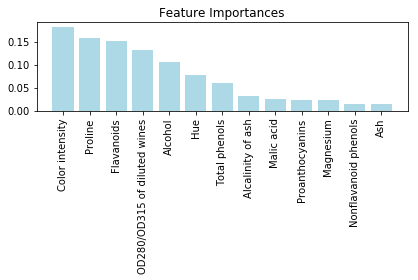

In [16]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = df_wine.columns[1:] # 特徴量の名称

forest = RandomForestClassifier(n_estimators=10000,
                                random_state=0,
                                n_jobs=-1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_ # 特徴量の重要度を抽出

indices = np.argsort(importances)[::-1] # 重要度の降順で特徴量のインデックスを抽出

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

# チャートで描画
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        color='lightblue', 
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
#plt.savefig('./random_forest.png', dpi=300)
plt.show()

In [18]:
# 重要度が0.15以上の特徴のみ抽出
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(forest, threshold=0.15, prefit=True)
X_selected = sfm.transform(X_train)

In [20]:
X_selected.shape

(124, 3)